# **Метрики удобочитаемости, лексического разнообразия и пр. для датасета**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import colorsys

## Объединение данных в один датасет

In [2]:
# Читаем несколько файлов с метриками (для разных авторов)
df1 = pd.read_csv('dataset_part1.csv', sep=',') 
df1.index = df1['Unnamed: 0']
df1['author'].unique()

array(['anton-chekhov', 'dmitriy-mamin-sibiryak', 'fedor-dostoevskii',
       'ivan-goncharov', 'ivan-turgenev', 'lev-tolstoi'], dtype=object)

In [3]:
df2 = pd.read_csv('dataset_part2.csv', sep=',')
df2.index = df2['Unnamed: 0']
df2['author'].unique()

array(['lev-tolstoi', 'maksim-gorkii'], dtype=object)

In [4]:
df3 = pd.read_csv('dataset_part3.csv', sep=',')
df3.index = df3['Unnamed: 0']
df3['author'].unique()

array(['maksim-gorkii', 'nikolai-gogol', 'sergey-aksakov'], dtype=object)

In [5]:
#Делаем общий датасет для всех авторов
df = df1.append(df2).append(df3)

In [6]:
df['author'].unique()

array(['anton-chekhov', 'dmitriy-mamin-sibiryak', 'fedor-dostoevskii',
       'ivan-goncharov', 'ivan-turgenev', 'lev-tolstoi', 'maksim-gorkii',
       'nikolai-gogol', 'sergey-aksakov'], dtype=object)

In [7]:
#Удаляем одинаковые строки в объединенном датасете
df = df.drop_duplicates(['Unnamed: 0'])
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
#Показатели среднего/женского/мужского рода, пассивного/активного залога и т.д. выражаем как долю от общего числа слов в главе
for column in ['neut',
       'masc', 'femn', 'plur','sing', 'pres', 'past', 'futr', 'pssv', 'actv', '2per',
       '3per', '1per']:
    df[column] = df[column] / df['n_words']

## Часть 1: Изучить особенности данных

### 1.1 Основные статистики для всех признаков

In [9]:
df.describe(include='all')

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mamtld,hdd,simpson_index,hapax_index,author,1per,2per,futr,past,pssv
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2.036000e+03,2036.000000,...,2036.000000,2036.000000,2036.000000,2036.000000,2036,1824.000000,1679.000000,1812.000000,2015.000000,1911.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,lev-tolstoi,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,747,NaN,NaN,NaN,NaN,NaN
mean,129.905697,2319.201375,943.064342,959.969057,326.750982,1851.349705,700.290766,1477.809921,1.463957e+04,11514.990177,...,178.041701,0.888772,167.305318,1351.187836,NaN,0.035519,0.020374,0.012013,0.101350,0.009032
std,327.975848,6608.464037,1558.548883,3000.992001,1036.824003,5272.056270,1824.574326,4496.687108,4.370152e+04,34642.677192,...,97.510938,0.169669,51.547013,307.675386,NaN,0.026570,0.016433,0.008477,0.037095,0.008451
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.000000e+00,7.000000,...,1.000000,-1.000000,0.000000,0.000000,NaN,0.000674,0.000189,0.000685,0.003922,0.000331
25%,32.000000,614.250000,375.000000,255.750000,83.000000,479.000000,170.000000,391.750000,3.905250e+03,3089.500000,...,126.037215,0.895151,141.977478,1191.471162,NaN,0.014959,0.007866,0.006289,0.081075,0.004195
50%,63.000000,1131.500000,617.500000,476.000000,161.000000,890.000000,325.500000,720.500000,7.146000e+03,5595.500000,...,177.590762,0.907327,163.445148,1320.332311,NaN,0.029885,0.016522,0.010265,0.107843,0.006737
75%,126.000000,2001.000000,994.000000,845.000000,291.000000,1591.500000,619.500000,1278.250000,1.256675e+04,9976.250000,...,232.670872,0.917278,189.706356,1468.576565,NaN,0.051511,0.029687,0.015522,0.127197,0.010309


In [10]:
print(df[df['n_words'] < 100].index)

Index(['vishnevyi-sad. Text/chapter1.xhtml', 'chaika. Text/chapter1.xhtml',
       'tri-sestry. Text/chapter1.xhtml',
       'silnye-oshusheniya. Text/annotation.xhtml',
       'ty-i-vy. Text/annotation.xhtml',
       's-zhenoi-possorilsya. Text/annotation.xhtml',
       'protekciya. Text/annotation.xhtml', 'v-vagone. Text/annotation.xhtml',
       'sovet. Text/annotation.xhtml', 'zhilec. Text/annotation.xhtml',
       'vesnoi. Text/annotation.xhtml', 'grisha. Text/annotation.xhtml',
       'svidanie-khotya-i-sostoyalos-no. Text/annotation.xhtml',
       'tif. Text/annotation.xhtml', 'radost. Text/annotation.xhtml',
       'sobytie. Text/annotation.xhtml', 'ushla. Text/annotation.xhtml',
       'ekzamen-na-chin. Text/annotation.xhtml',
       'zhenikh. Text/annotation.xhtml',
       'vosklicatelnyi-znak. Text/annotation.xhtml',
       'baran-i-baryshnya. Text/annotation.xhtml',
       'dyadya-vanya. Text/chapter1.xhtml', 'delec. Text/annotation.xhtml',
       'albom. Text/annotation.xh

In [11]:
df['author'].value_counts()

lev-tolstoi               747
ivan-turgenev             333
fedor-dostoevskii         279
nikolai-gogol             206
anton-chekhov             186
maksim-gorkii             100
dmitriy-mamin-sibiryak     96
ivan-goncharov             57
sergey-aksakov             32
Name: author, dtype: int64

In [12]:
df.shape[0]

2036

In [13]:
max(list(range(0, df.shape[0]-1)))

2034

In [14]:
for i in range(df.shape[0]):
  if 'annotation' in df.index[i]:
    print(i)
    books = df.drop(df.index[i])

5
7
13
15
18
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
67
69
71
73
75
77
79
81
83
85
87
89
91
97
99
101
103
105
107
109
111
113
115
117
122
126
128
130
132
134
136
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
272
277
281
289
340
432
435
437
462
495
542
548
560
603
617
664
700
726
750
835
837
883
912
914
936
950
979
1110
1117
1163
1191
1220
1585
1590
1599
1613
1626
1628
1654
1697
1703
1705
1719
1728
1730
1732
1797
1846
1901
1924
1942
1990
1992
1996
1998
2001
2003
2005
2029
2035


In [15]:
books = books[books['n_sents']>3]

In [16]:
books['author'].value_counts()

lev-tolstoi               746
ivan-turgenev             325
fedor-dostoevskii         279
nikolai-gogol             201
anton-chekhov             173
dmitriy-mamin-sibiryak     96
maksim-gorkii              92
ivan-goncharov             57
sergey-aksakov             31
Name: author, dtype: int64

In [17]:
books.describe()

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mtld,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1816.000000,1674.000000,1806.000000,1992.000000,1893.000000
mean,132.205500,2359.062000,958.606000,976.20550,332.159500,1883.410000,712.526500,1503.043000,1.488908e+04,11710.822500,...,198.512782,180.692166,0.898249,166.792482,1349.213442,0.035427,0.020298,0.011982,0.101783,0.008821
std,330.463395,6660.943971,1568.138487,3025.42144,1045.322073,5313.835895,1838.623804,4533.014112,4.405321e+04,34922.076744,...,81.002413,95.901125,0.106458,40.429242,258.260204,0.026463,0.016236,0.008357,0.036916,0.008076
min,4.000000,27.000000,19.000000,13.00000,3.000000,19.000000,5.000000,16.000000,1.770000e+02,139.000000,...,27.000000,1.000000,-1.000000,23.400000,449.389631,0.000674,0.000189,0.000685,0.003922,0.000331
25%,33.000000,649.500000,391.000000,270.75000,88.000000,500.000000,182.750000,422.500000,4.171000e+03,3254.750000,...,142.740200,129.215813,0.895485,142.386890,1194.008509,0.014959,0.007850,0.006293,0.081904,0.004171
50%,64.000000,1153.000000,625.000000,483.00000,165.000000,900.000000,333.000000,733.000000,7.254500e+03,5693.500000,...,184.806157,178.874014,0.907544,163.496554,1320.790750,0.029864,0.016518,0.010265,0.108103,0.006703
75%,128.250000,2059.750000,1010.500000,865.25000,294.000000,1629.000000,628.750000,1295.000000,1.289025e+04,10143.250000,...,239.232703,233.558771,0.917283,189.482735,1466.637489,0.051491,0.029655,0.015519,0.127388,0.010218
max,7286.000000,170197.000000,33087.000000,80175.00000,27654.000000,135233.000000,44097.000000,118790.000000,1.147321e+06,911997.000000,...,648.686694,718.113462,0.957839,444.666667,3655.652313,0.225352,0.117647,0.068269,0.222222,0.069444


### 1.2 Пропущенные значения

In [18]:
# Посмотрим, какую долю занимают пропущенные значения для каждого признака от общего числа объектов
books.isna().sum()/len(df)

n_sents                        0.000000
n_words                        0.000000
n_unique_words                 0.000000
n_long_words                   0.000000
n_complex_words                0.000000
n_simple_words                 0.000000
n_monosyllable_words           0.000000
n_polysyllable_words           0.000000
n_chars                        0.000000
n_letters                      0.000000
n_spaces                       0.000000
n_syllables                    0.000000
n_punctuations                 0.000000
flesch_kincaid_grade           0.000000
flesch_reading_easy            0.000000
coleman_liau_index             0.000000
smog_index                     0.000000
automated_readability_index    0.000000
lix                            0.000000
Unnamed: 20                    0.000000
femn                           0.000491
masc                           0.000000
neut                           0.000000
plur                           0.001473
sing                           0.000000


* В данном случае пропущенные значения присутствуют в показателях: женского/мужского/нейтрального родов, множественного числа, настоящего/прошедшего/будущего времен, активного/пассивного залогов, первого/второго/третьего лиц. 
* Для каждого из этих показателей пропущенное значение означает, что этот род/число/время/залог/лицо не были использованы и найдены в тексте. 
* Это означает, что пропущенные значения **можно заменять на нули**.

In [19]:
books = books.fillna(value=0)

In [20]:
books.describe()

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mtld,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,132.205500,2359.062000,958.606000,976.20550,332.159500,1883.410000,712.526500,1503.043000,1.488908e+04,11710.822500,...,198.512782,180.692166,0.898249,166.792482,1349.213442,0.032167,0.016990,0.010820,0.101376,0.008349
std,330.463395,6660.943971,1568.138487,3025.42144,1045.322073,5313.835895,1838.623804,4533.014112,4.405321e+04,34922.076744,...,81.002413,95.901125,0.106458,40.429242,258.260204,0.027216,0.016639,0.008697,0.037398,0.008104
min,4.000000,27.000000,19.000000,13.00000,3.000000,19.000000,5.000000,16.000000,1.770000e+02,139.000000,...,27.000000,1.000000,-1.000000,23.400000,449.389631,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,649.500000,391.000000,270.75000,88.000000,500.000000,182.750000,422.500000,4.171000e+03,3254.750000,...,142.740200,129.215813,0.895485,142.386890,1194.008509,0.010271,0.003094,0.004768,0.081410,0.003839
50%,64.000000,1153.000000,625.000000,483.00000,165.000000,900.000000,333.000000,733.000000,7.254500e+03,5693.500000,...,184.806157,178.874014,0.907544,163.496554,1320.790750,0.026211,0.013032,0.009410,0.107881,0.006408
75%,128.250000,2059.750000,1010.500000,865.25000,294.000000,1629.000000,628.750000,1295.000000,1.289025e+04,10143.250000,...,239.232703,233.558771,0.917283,189.482735,1466.637489,0.048163,0.026361,0.014782,0.127242,0.009877
max,7286.000000,170197.000000,33087.000000,80175.00000,27654.000000,135233.000000,44097.000000,118790.000000,1.147321e+06,911997.000000,...,648.686694,718.113462,0.957839,444.666667,3655.652313,0.225352,0.117647,0.068269,0.222222,0.069444


### 1.3 Ошибочные значения и выбросы

Сначала посмотрим на boxplot.

In [21]:
books.columns

Index(['n_sents', 'n_words', 'n_unique_words', 'n_long_words',
       'n_complex_words', 'n_simple_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_chars', 'n_letters', 'n_spaces',
       'n_syllables', 'n_punctuations', 'flesch_kincaid_grade',
       'flesch_reading_easy', 'coleman_liau_index', 'smog_index',
       'automated_readability_index', 'lix', 'Unnamed: 20', 'femn', 'masc',
       'neut', 'plur', 'sing', 'pres', 'actv', '3per', 'ttr', 'rttr', 'cttr',
       'httr', 'sttr', 'mttr', 'dttr', 'mattr', 'msttr', 'mtld', 'mamtld',
       'hdd', 'simpson_index', 'hapax_index', 'author', '1per', '2per', 'futr',
       'past', 'pssv'],
      dtype='object')

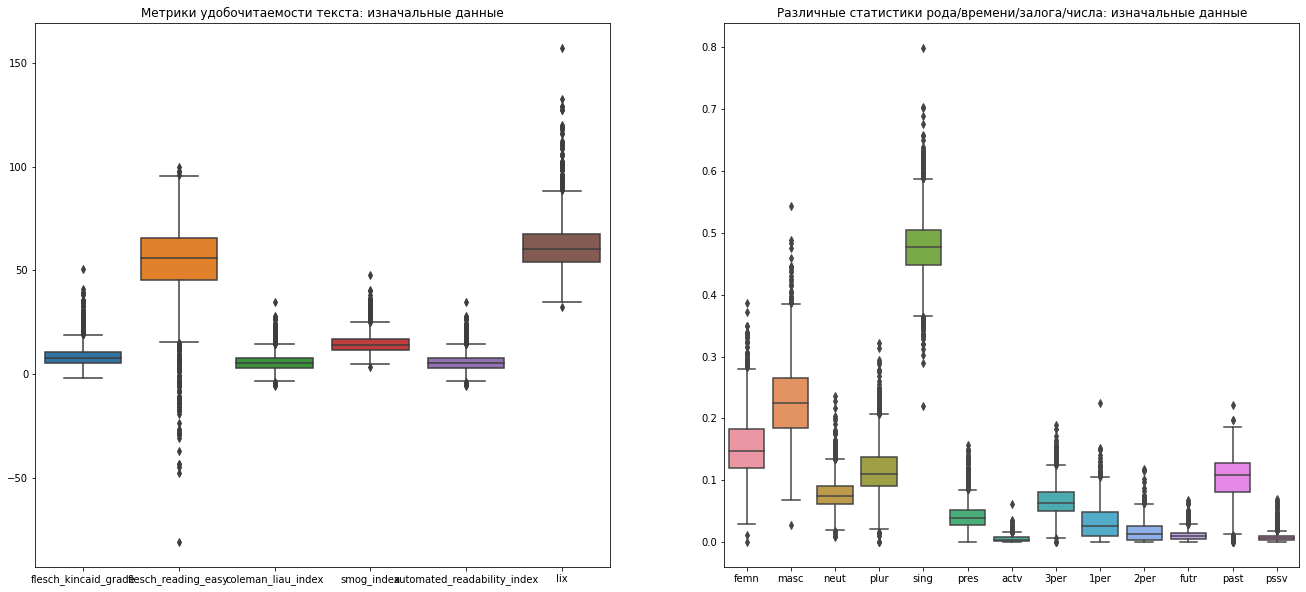

In [22]:
fig = plt.figure(figsize = (35, 10))

fig.add_subplot(131)
sns.boxplot(data=books[['flesch_kincaid_grade', 'flesch_reading_easy', 'coleman_liau_index',
       'smog_index', 'automated_readability_index', 'lix']])
plt.title('Метрики удобочитаемости текста: изначальные данные', fontsize=12)

fig.add_subplot(132)
sns.boxplot(data=books[['femn', 'masc',
       'neut', 'plur', 'sing', 'pres', 'actv', '3per', '1per', '2per', 'futr',
       'past', 'pssv']])
plt.title('Различные статистики рода/времени/залога/числа: изначальные данные', fontsize=12)
plt.show()


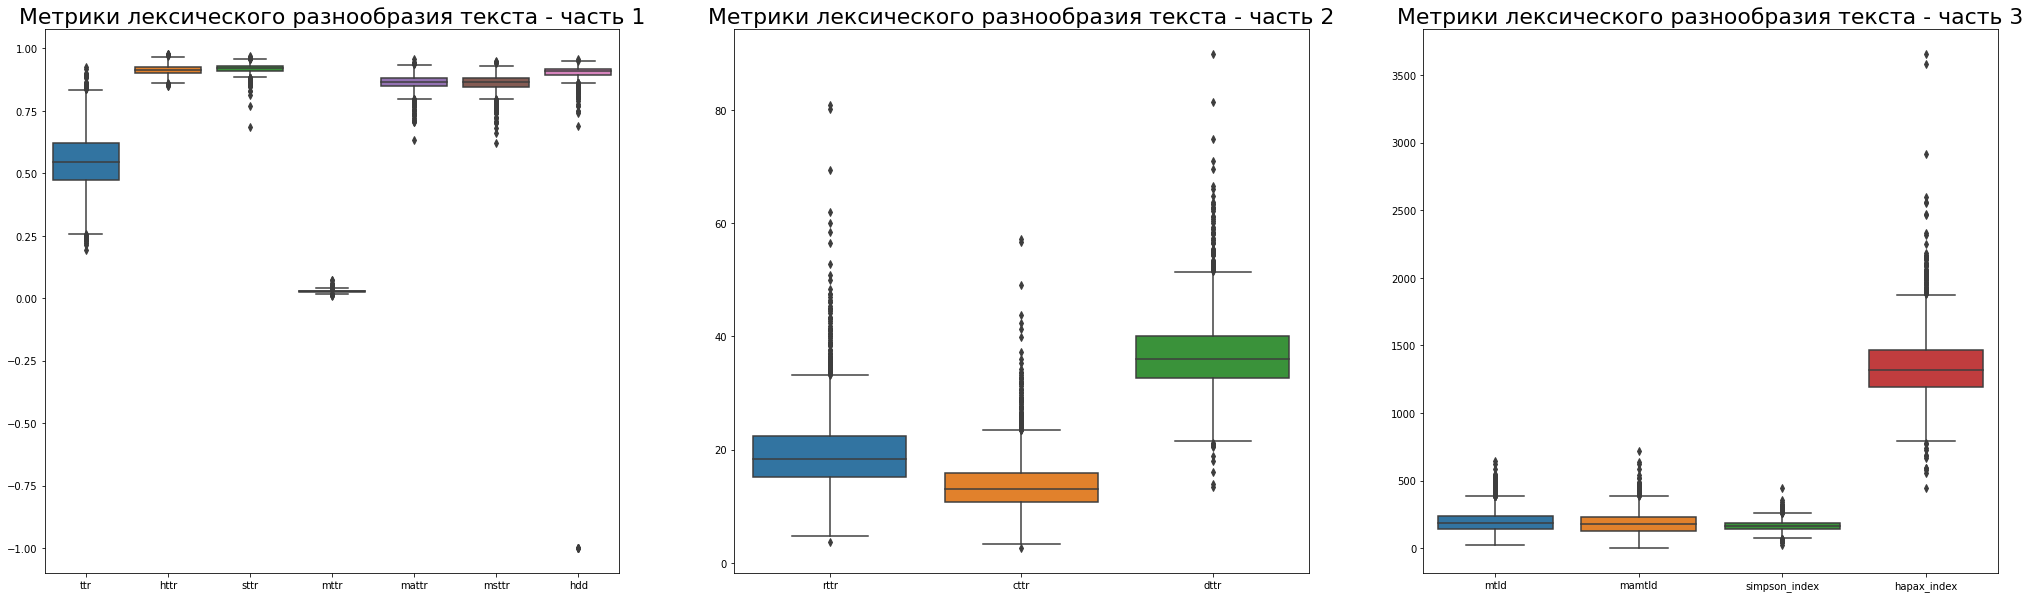

In [23]:
fig = plt.figure(figsize = (35, 10))

fig.add_subplot(131)
sns.boxplot(data=books[['ttr',
       'httr', 'sttr', 'mttr', 'mattr', 'msttr',
       'hdd']])
plt.title('Метрики лексического разнообразия текста - часть 1', fontsize=22)

fig.add_subplot(132)
sns.boxplot(data=books[['rttr', 'cttr', 'dttr']])
plt.title('Метрики лексического разнообразия текста - часть 2', fontsize=22)

fig.add_subplot(133)
sns.boxplot(data=books[['mtld', 'mamtld', 'simpson_index', 'hapax_index']])
plt.title('Метрики лексического разнообразия текста - часть 3', fontsize=22)

plt.show()

In [24]:
lower_bound = df['flesch_reading_easy'].quantile(q=0.025)
upper_bound = df['flesch_reading_easy'].quantile(q=0.975)

to_easy = df[df['flesch_reading_easy'] > upper_bound]
to_hard = df[df['flesch_reading_easy'] < lower_bound]

print(set(to_easy.index[:-16]))
print(set(to_hard.index[:-16]))

{'besy. Text/chapter16.xhtml', 'zhivoi-trup. Text/chapter9.xhtml', 'voina-i-mir. Text/chapter100.xhtml', 'nakanune. Text/chapter16.xhtml', 'stikhotvoreniya-v-proze. Text/chapter72.xhtml', 'stikhotvoreniya-v-proze. Text/chapter4.xhtml', 'bezotcovshina. Text/chapter4.xhtml', 'bezotcovshina. Text/chapter6.xhtml', 'stikhotvoreniya-v-proze. Text/chapter5.xhtml', 'voina-i-mir. Text/chapter271.xhtml', 'zhivoi-trup. Text/chapter16.xhtml', 'stikhotvoreniya-v-proze. Text/chapter68.xhtml', 'zhivoi-trup. Text/chapter4.xhtml', 'stikhotvoreniya-v-proze. Text/chapter62.xhtml', 'voina-i-mir. Text/chapter26.xhtml', 'bezotcovshina. Text/chapter7.xhtml', 'stikhotvoreniya-v-proze. Text/chapter66.xhtml', 'asya. Text/chapter17.xhtml', 'stikhotvoreniya-v-proze. Text/chapter71.xhtml', 'otrochestvo. Text/chapter10.xhtml', 'otrochestvo. Text/chapter9.xhtml', 'stikhotvoreniya-v-proze. Text/chapter47.xhtml', 'stikhotvoreniya-v-proze. Text/chapter77.xhtml', 'bezotcovshina. Text/chapter5.xhtml', 'kreicerova-sonata.

In [25]:
lower_bound = df['mttr'].quantile(q=0.025)
upper_bound = df['mttr'].quantile(q=0.975)

to_diverse = df[df['mttr'] > upper_bound]
to_similar = df[df['mttr'] < lower_bound]

print(set(to_diverse.index[:-16]))
print(set(to_similar.index[:-16]))

{'kreicerova-sonata. Text/chapter2.xhtml', 'revizor. Text/chapter31.xhtml', 'revizor. Text/chapter55.xhtml', 'zhivoi-trup. Text/chapter13.xhtml', 'kreicerova-sonata. Text/chapter27.xhtml', 'zhivoi-trup. Text/chapter3.xhtml', 'revizor. Text/chapter16.xhtml', 'zhenitba. Text/chapter4.xhtml', 'revizor. Text/chapter45.xhtml', 'voina-i-mir. Text/chapter169.xhtml', 'revizor. Text/chapter53.xhtml', 'revizor. Text/chapter54.xhtml', 'idiot. Text/chapter39.xhtml', 'revizor. Text/chapter17.xhtml', 'stikhotvoreniya-v-proze. Text/chapter10.xhtml', 'revizor. Text/chapter46.xhtml', 'revizor. Text/chapter29.xhtml', 'stikhotvoreniya-v-proze. Text/chapter47.xhtml', 'belye-nochi. Text/chapter4.xhtml', 'revizor. Text/chapter25.xhtml', 'unizhennye-i-oskorblennye. Text/chapter48.xhtml', 'unizhennye-i-oskorblennye. Text/chapter9.xhtml', 'stikhotvoreniya-v-proze. Text/chapter77.xhtml', 'voina-i-mir. Text/chapter384.xhtml', 'revizor. Text/chapter22.xhtml', 'zhivoi-trup. Text/chapter7.xhtml', 'zhivoi-trup. Text

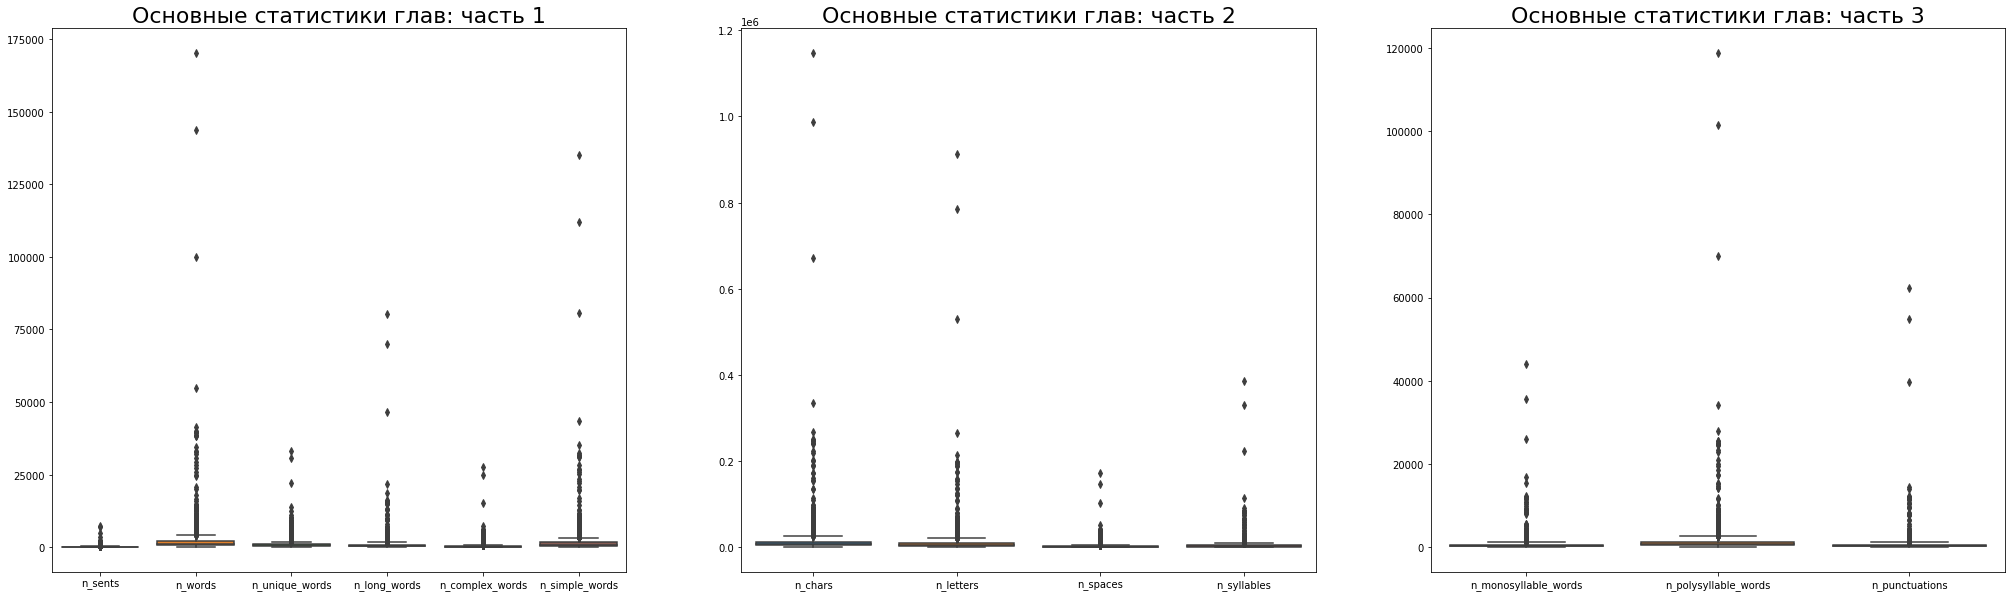

In [26]:
fig = plt.figure(figsize = (35, 10))

fig.add_subplot(131)
sns.boxplot(data=books[['n_sents', 'n_words', 'n_unique_words', 'n_long_words',
       'n_complex_words', 'n_simple_words']])
plt.title('Основные статистики глав: часть 1', fontsize=22)

fig.add_subplot(132)
sns.boxplot(data=books[['n_chars', 'n_letters', 'n_spaces',
       'n_syllables']])
plt.title('Основные статистики глав: часть 2', fontsize=22)

fig.add_subplot(133)
sns.boxplot(data=books[['n_monosyllable_words',
       'n_polysyllable_words', 'n_punctuations']])
plt.title('Основные статистики глав: часть 3', fontsize=22)

plt.show()

In [27]:
lower_bound = df['n_words'].quantile(q=0.025)
upper_bound = df['n_words'].quantile(q=0.975)

to_big = df[df['n_words'] > upper_bound]
to_small = df[df['n_words'] < lower_bound]

print(set(to_big.index[:-16]))
print(set(to_small.index[:-16]))

{'drama-na-okhote. Text/chapter1.xhtml', 'besy. Text/chapter25.xhtml', 'oblomov. Text/chapter9.xhtml', 'prestuplenie-i-nakazanie. Text/chapter4.xhtml', 'zhizn-klima-samgina. Text/chapter2.xhtml', 'besy. Text/chapter3.xhtml', 'anna-karenina. Text/chapter4.xhtml', 'prestuplenie-i-nakazanie. Text/chapter1.xhtml', 'prestuplenie-i-nakazanie. Text/chapter2.xhtml', 'besy. Text/chapter4.xhtml', 'anna-karenina. Text/chapter1.xhtml', 'anna-karenina. Text/chapter2.xhtml', 'foma-gordeev. Text/chapter3.xhtml', 'prestuplenie-i-nakazanie. Text/chapter3.xhtml', 'bezotcovshina. Text/chapter2.xhtml', 'bratya-karamazovy. Text/chapter49.xhtml', 'besy. Text/chapter28.xhtml', 'bednye-lyudi. Text/chapter1.xhtml', 'prestuplenie-i-nakazanie. Text/chapter5.xhtml', 'anna-karenina. Text/chapter3.xhtml', 'besy. Text/chapter13.xhtml', 'anna-karenina. Text/chapter6.xhtml', 'skuchnaya-istoriya. Text/chapter1.xhtml', 'prestuplenie-i-nakazanie. Text/chapter6.xhtml', 'besy. Text/chapter6.xhtml', 'besy. Text/chapter8.xht

In [28]:
#Удаляем некоторые метрики
books = books.drop(['n_sents', 'n_words', 'n_unique_words', 'n_long_words',
       'n_complex_words', 'n_simple_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_chars', 'n_letters', 'n_spaces',
       'n_syllables', 'n_punctuations', 'Unnamed: 20'], axis=1)

## Часть 2: Поведение признаков и связь с целевой переменной

Для начала придется закодировать целевую переменную - автора, т.к. сейчас это единственный категориальный столбец.

In [29]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder()
books['author_num'] = encoder.fit_transform(np.array(books['author']).reshape(-1,1))

In [30]:
books['author_num'].value_counts()

5.0    746
4.0    325
2.0    279
7.0    201
0.0    173
1.0     96
6.0     92
3.0     57
8.0     31
Name: author_num, dtype: int64

In [31]:
books.describe()

,flesch_kincaid_grade,flesch_reading_easy,coleman_liau_index,smog_index,automated_readability_index,lix,femn,masc,neut,plur,...,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv,author_num
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.617334,53.598274,5.745156,14.837998,5.745156,62.038332,0.154468,0.227249,0.078748,0.117063,...,180.692166,0.898249,166.792482,1349.213442,0.032167,0.016990,0.010820,0.101376,0.008349,4.031000
std,5.447480,18.971845,4.258551,4.992913,4.258551,12.660377,0.049745,0.061051,0.026370,0.040712,...,95.901125,0.106458,40.429242,258.260204,0.027216,0.016639,0.008697,0.037398,0.008104,2.028077
min,-1.860860,-81.106282,-5.542377,3.391642,-5.542377,32.287870,0.000000,0.028571,0.007752,0.000000,...,1.000000,-1.000000,23.400000,449.389631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.167011,45.353257,3.080294,11.591329,3.080294,53.936399,0.119550,0.184468,0.062213,0.090200,...,129.215813,0.895485,142.386890,1194.008509,0.010271,0.003094,0.004768,0.081410,0.003839,2.000000
50%,7.856421,56.163927,5.216731,14.203889,5.216731,60.323781,0.148112,0.224518,0.075050,0.110926,...,178.874014,0.907544,163.496554,1320.790750,0.026211,0.013032,0.009410,0.107881,0.006408,5.000000
75%,10.745510,65.494239,7.667561,17.020716,7.667561,67.729094,0.183449,0.264883,0.091128,0.136997,...,233.558771,0.917283,189.482735,1466.637489,0.048163,0.026361,0.014782,0.127242,0.009877,5.000000
max,50.763974,99.804315,34.960237,47.865850,34.960237,157.243590,0.387059,0.542636,0.236511,0.321856,...,718.113462,0.957839,444.666667,3655.652313,0.225352,0.117647,0.068269,0.222222,0.069444,8.000000


### 2.1 Корреляции признаков

Все признаки точно не придется одновременно использовать, потому что многие из них слишком похожи. Посмотрим на корреляции и уберем одинаковые.

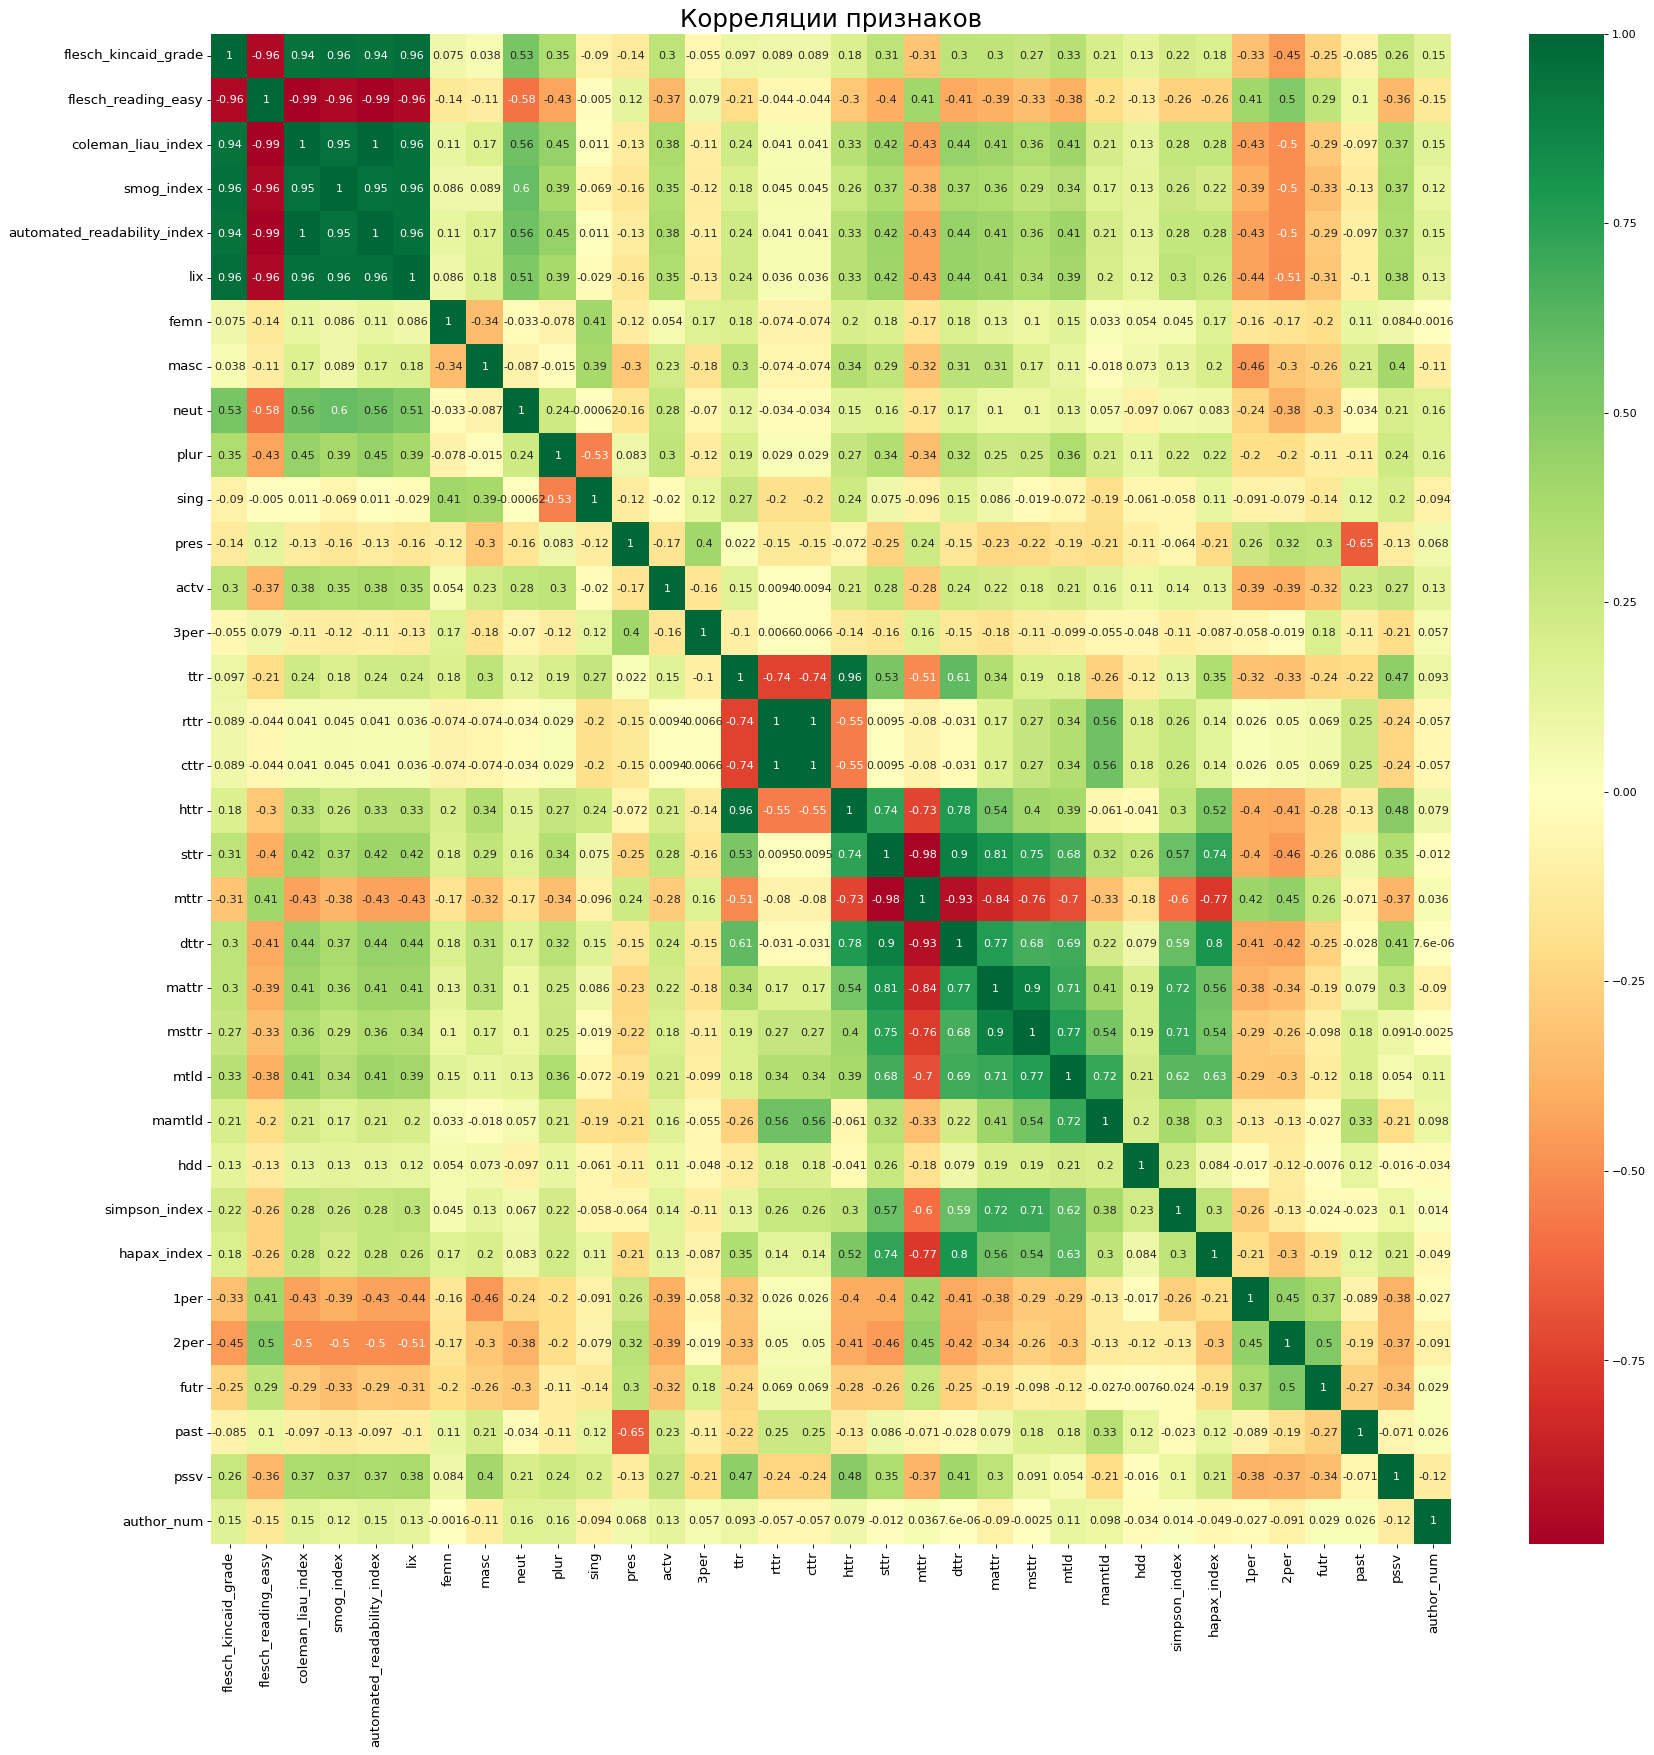

In [32]:
plt.figure(figsize=(25,25), dpi= 80)
sns.heatmap(books.corr(), xticklabels=books.corr().columns, yticklabels=books.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* Судя по корреляциям, **метрики удобочитаемости текста** дают очень похожие результаты между собой, поэтому есть смысл оставить только какую-либо одну вместо всех. Можно оставить только **smog_index**. Чем больше значение этой метрики, тем сложнее текст.

* Также метрики лексического разнообразия похожи между собой, но среди них есть не только совсем одинаковые. Можно оставить такие:
  * **hdd** Наиболее достоверная реализация алгоритма VocD (2010, McCarthy & Jarvis). В основе алгоритм лежит метод случайного отбора из текста сегментов длиной от 32 до 50 слов и вычисления для них TTR с последующим усреднением.
  * **mttr** Модификация метрики TTR с использованием логарифмической функции (1966, Mass). Наиболее стабильная метрика в отношении длины текста.



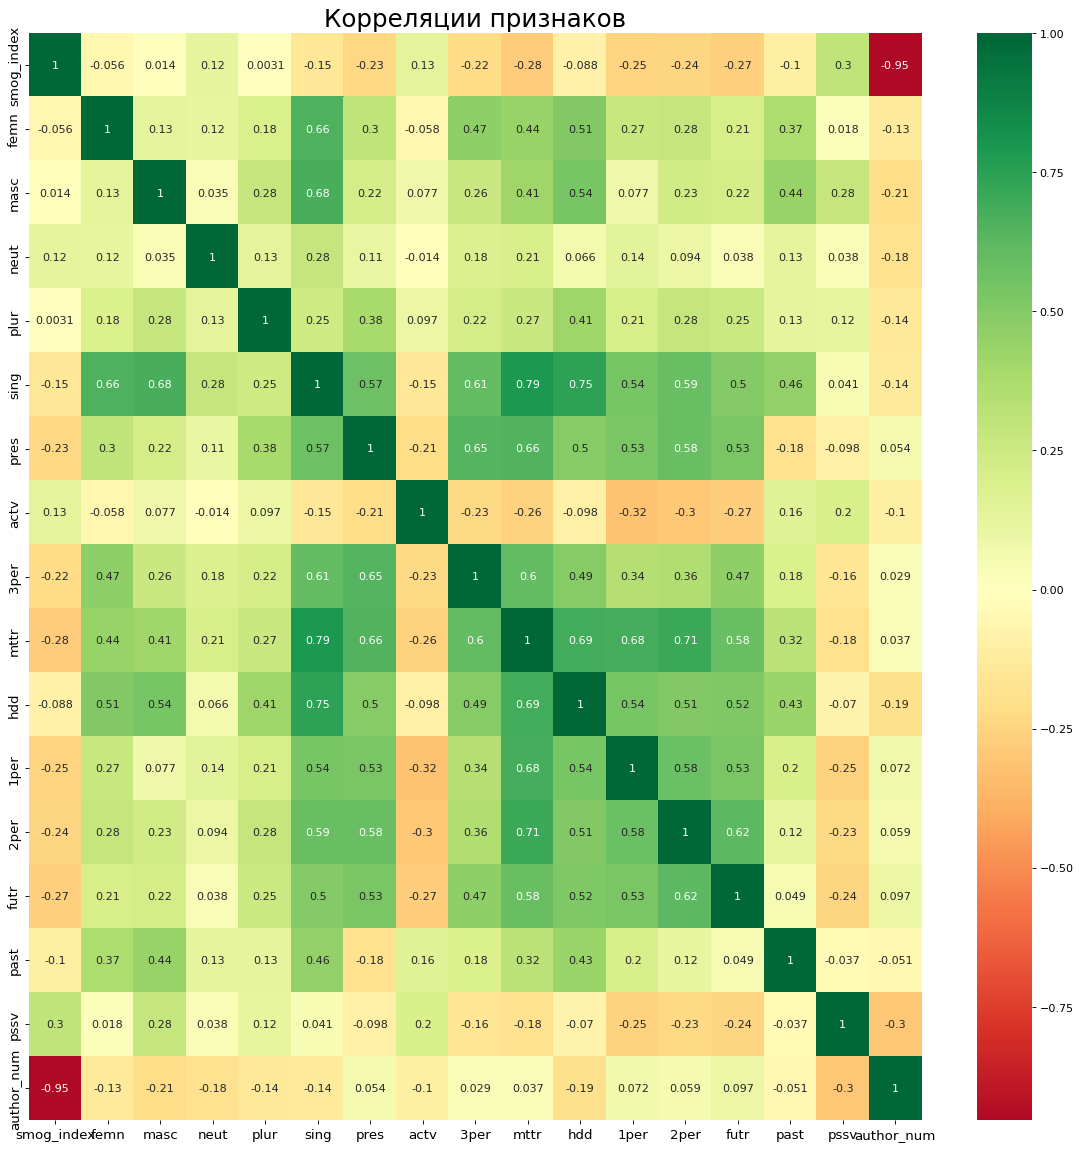

In [33]:
#Удалим ненужные столбцы
books = books.drop(['flesch_kincaid_grade', 'flesch_reading_easy', 'coleman_liau_index', 'automated_readability_index',
                    'ttr', 'rttr', 'cttr', 'httr', 'sttr', 'dttr', 'mattr', 'msttr', 'mamtld', 'hapax_index', 'mtld', 
                    'simpson_index', 'lix'], axis=1)

authors_data = books['author']
books_norm = books.drop(['author'], axis=1)
#Нормируем векторы
books_norm = books_norm.apply(lambda metric: metric/metric.sum(), axis=1)

#Еще раз посмотрим на корреляции
plt.figure(figsize=(18,18), dpi= 80)
sns.heatmap(books_norm.corr(), xticklabels=books_norm.corr().columns, yticklabels=books_norm.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2.1 Поведение каждого признака в отдельности

In [34]:
def metrics_density_by_author(m):
  sns.set(rc={'figure.figsize':(15,10)})
  for author in books['author'].unique():
    snsplot = sns.kdeplot(books[books['author']==author][m], shade=True, label=author)
    fig = snsplot.get_figure()
    plt.legend()

In [35]:
books.columns

Index(['smog_index', 'femn', 'masc', 'neut', 'plur', 'sing', 'pres', 'actv',
       '3per', 'mttr', 'hdd', 'author', '1per', '2per', 'futr', 'past', 'pssv',
       'author_num'],
      dtype='object')

Теперь рассмотрим распределения признаков отдельно для каждого автора.

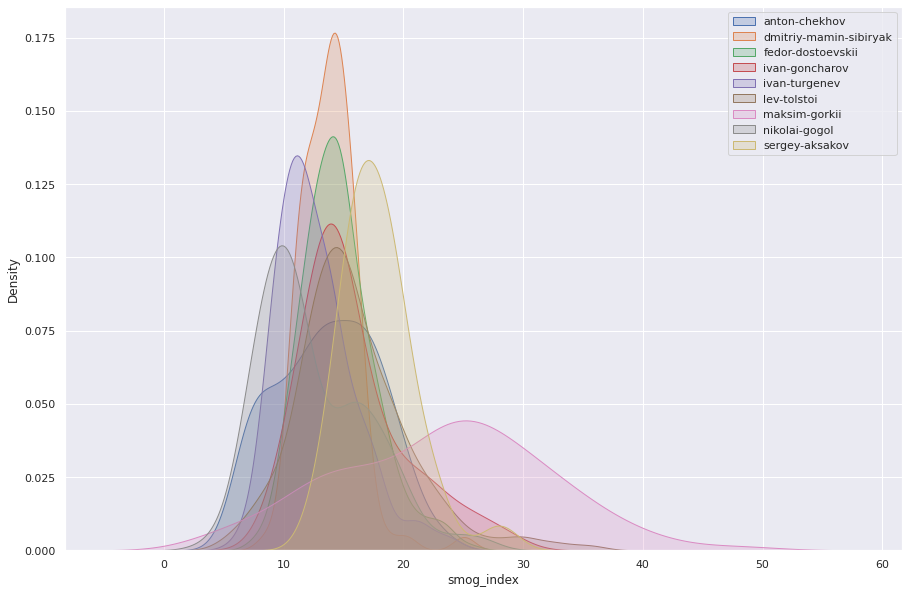

In [36]:

metrics_density_by_author('smog_index')

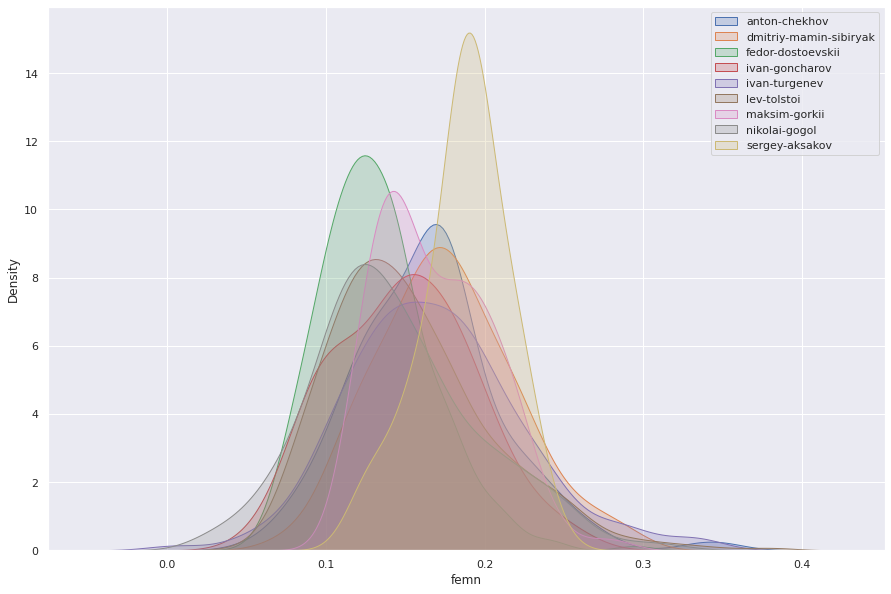

In [37]:
metrics_density_by_author('femn')

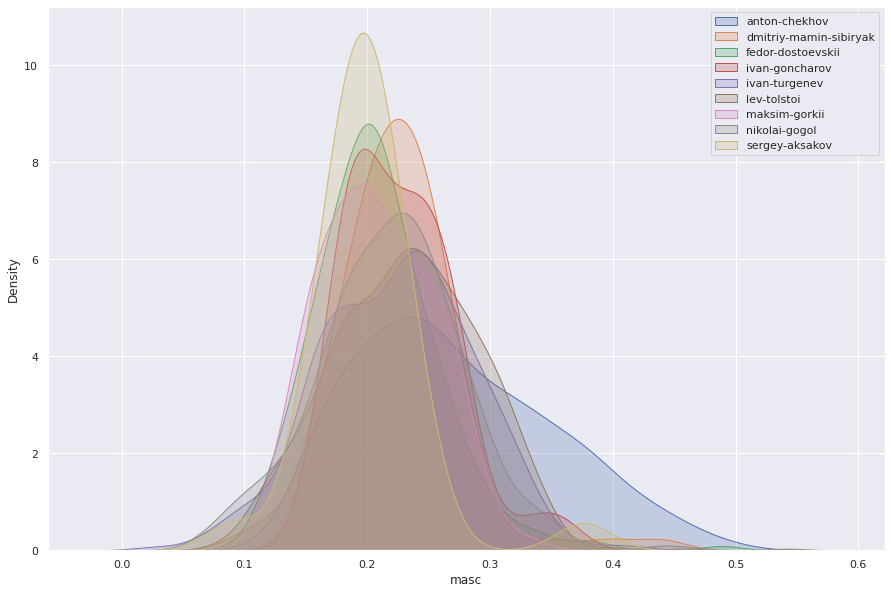

In [38]:
metrics_density_by_author('masc')

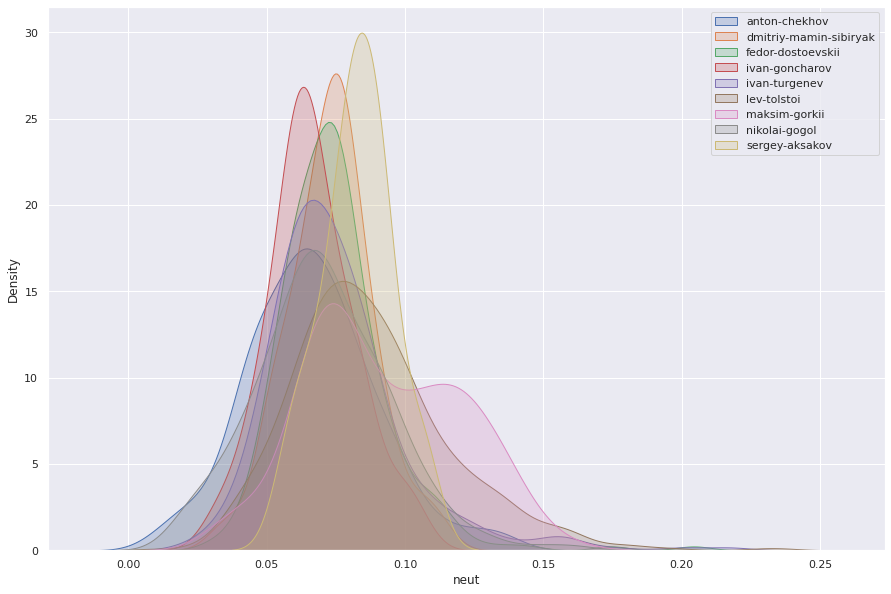

In [39]:
metrics_density_by_author('neut')

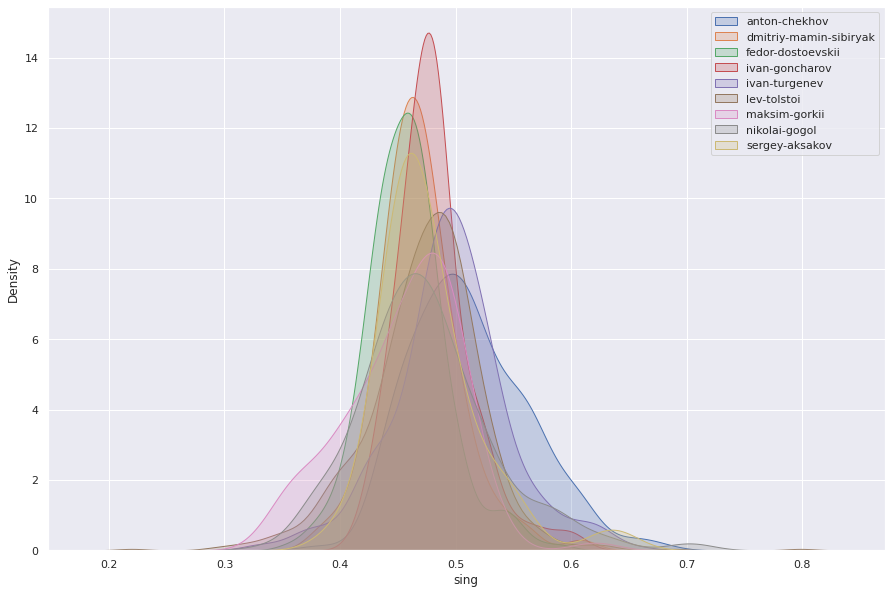

In [40]:
metrics_density_by_author('sing')

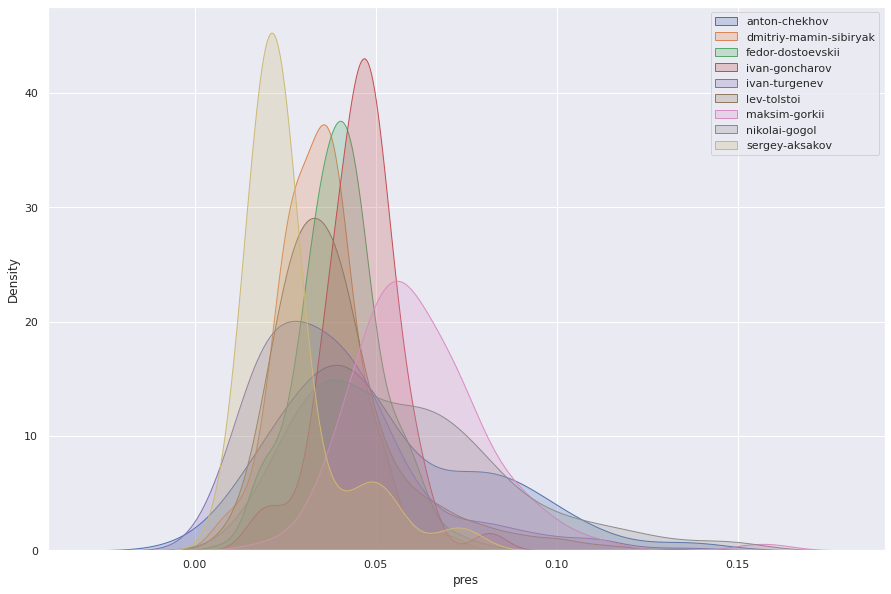

In [41]:
metrics_density_by_author('pres')

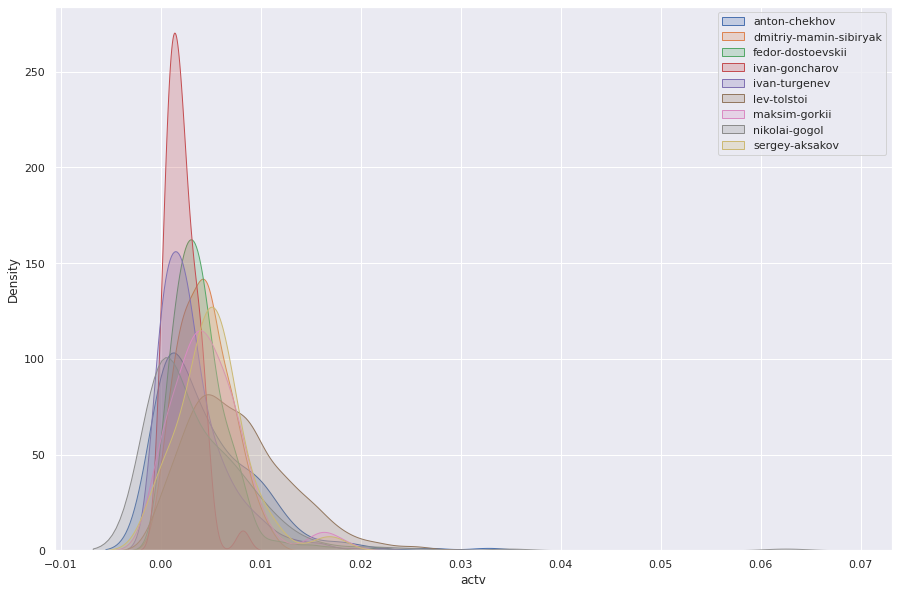

In [42]:
metrics_density_by_author('actv')

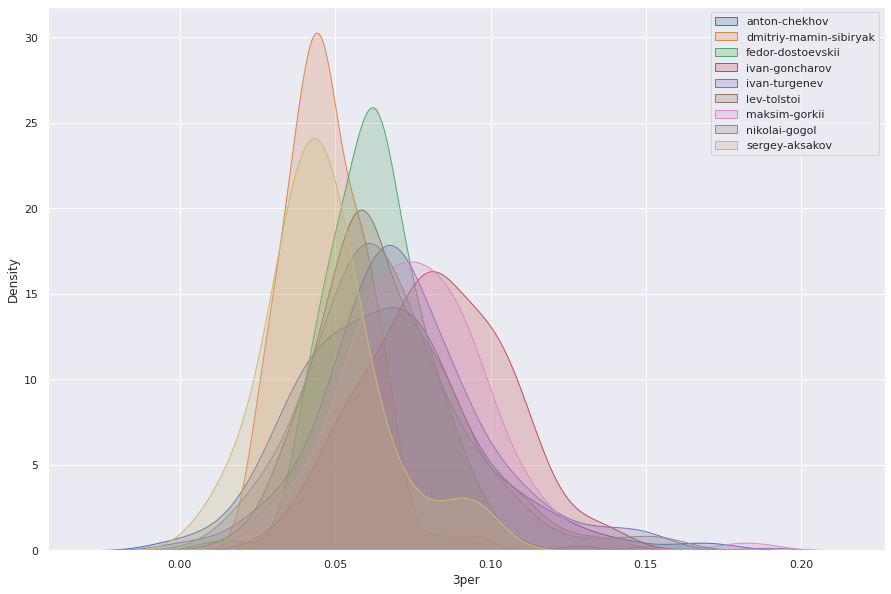

In [43]:
metrics_density_by_author('3per')

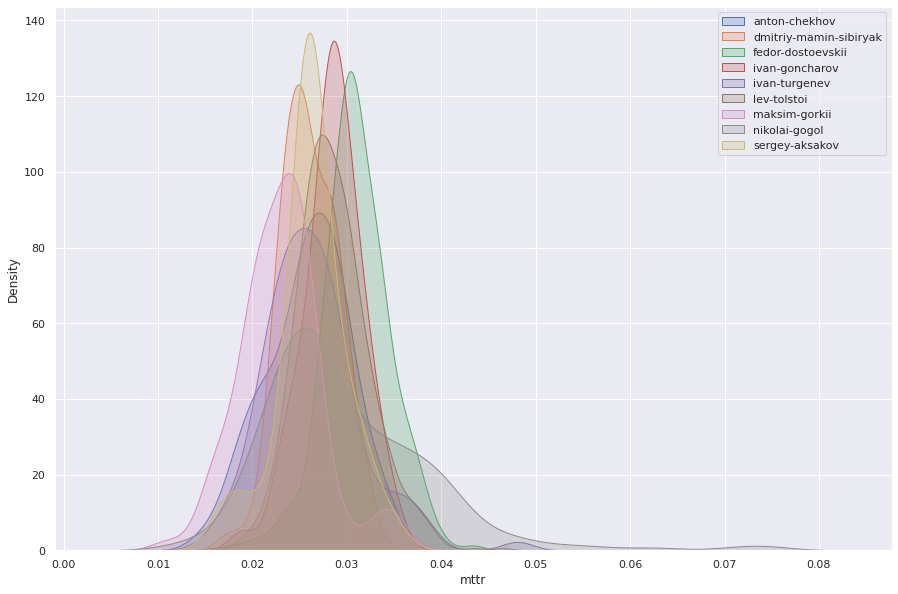

In [44]:
metrics_density_by_author('mttr')

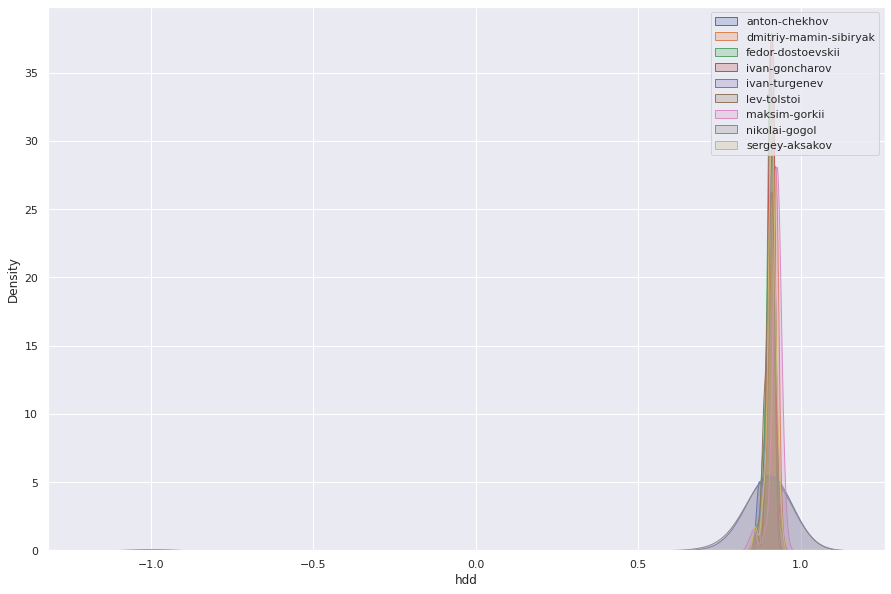

In [45]:
metrics_density_by_author('hdd')

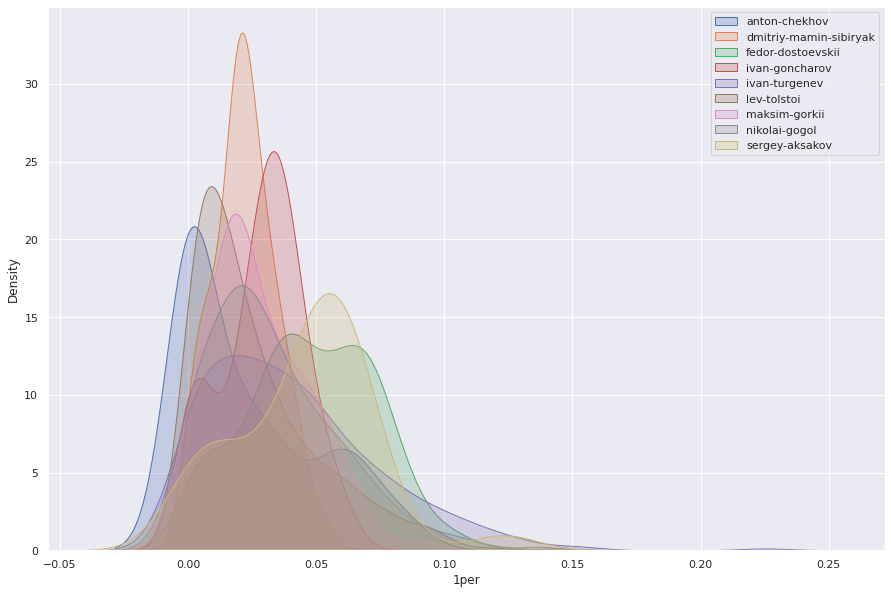

In [46]:
metrics_density_by_author('1per')

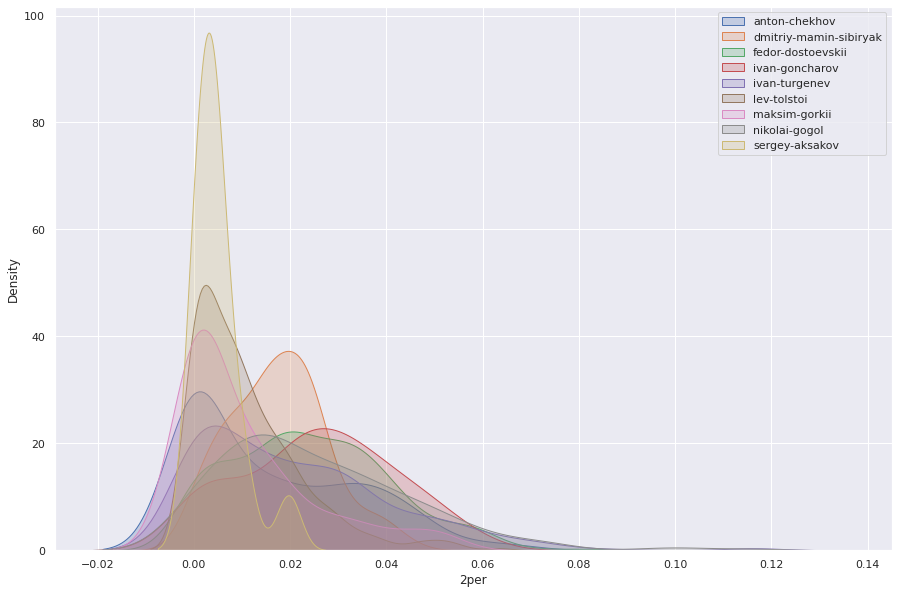

In [47]:
metrics_density_by_author('2per')

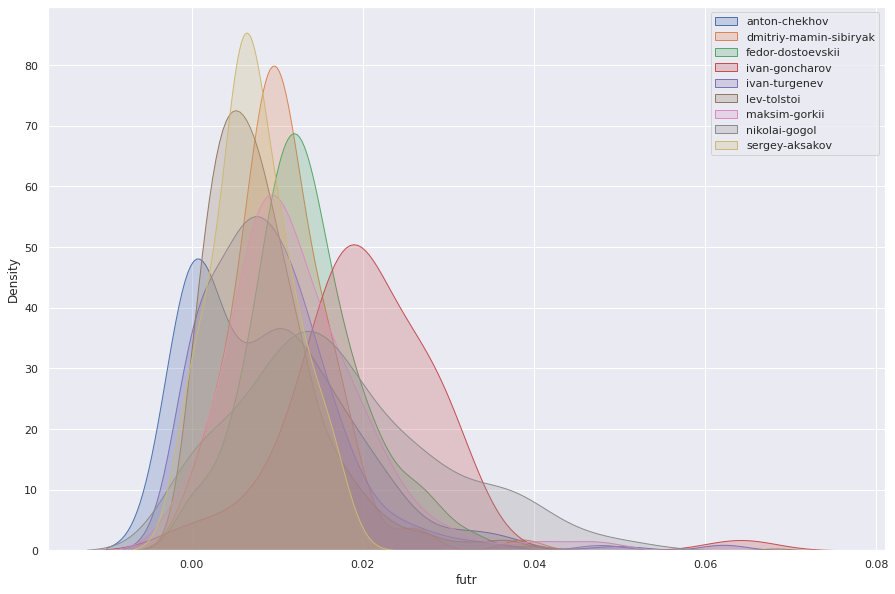

In [48]:
metrics_density_by_author('futr')

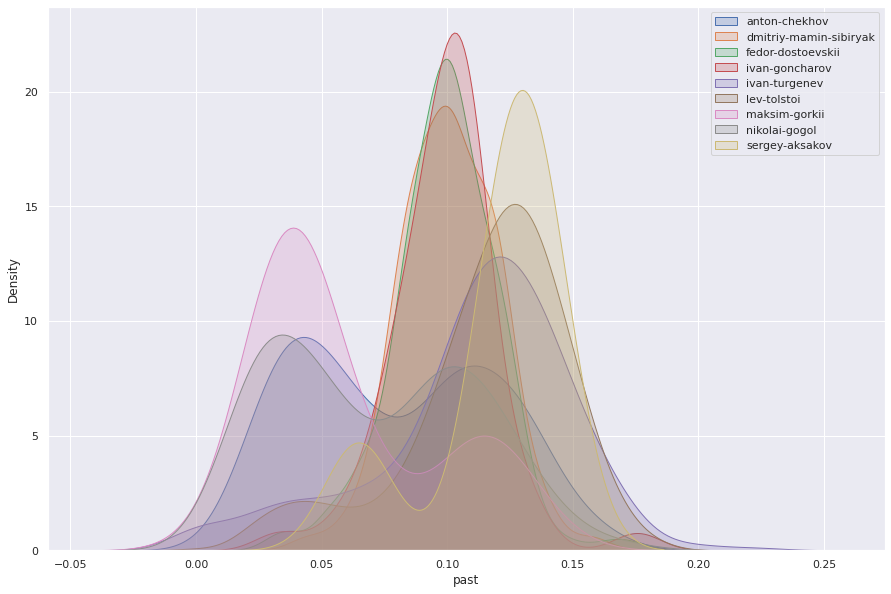

In [49]:
metrics_density_by_author('past')

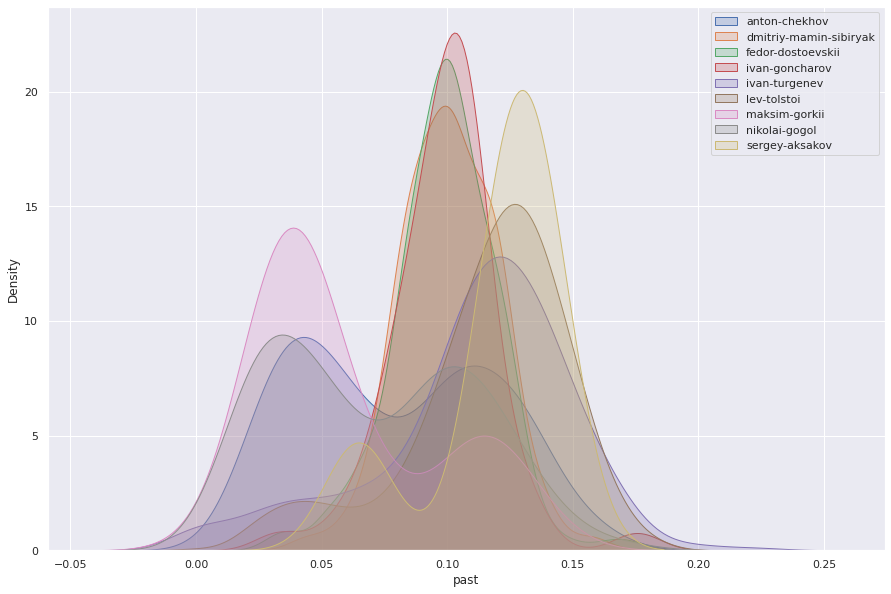

In [50]:
metrics_density_by_author('past')

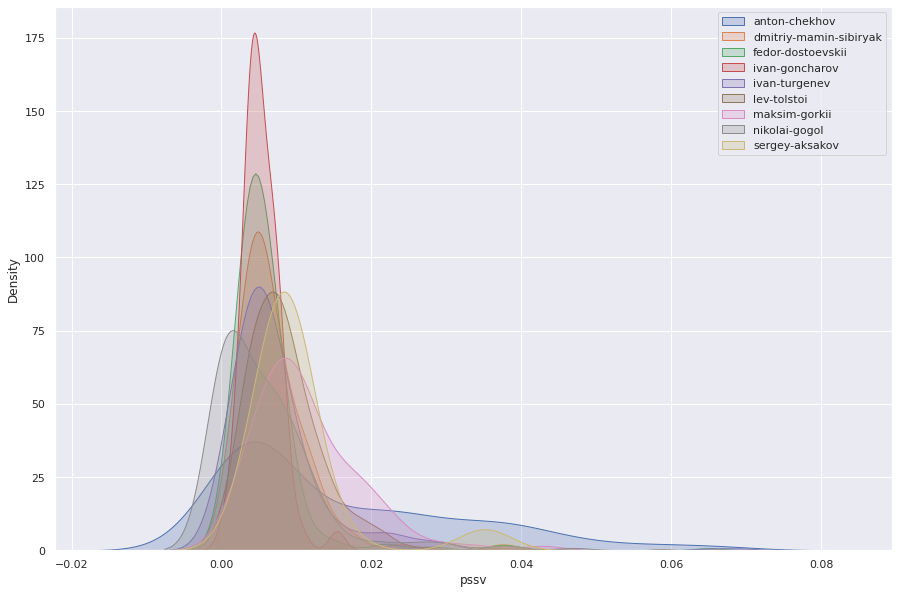

In [51]:
metrics_density_by_author('pssv')

In [52]:
books.drop(['author', 'author_num'], axis=1).columns

Index(['smog_index', 'femn', 'masc', 'neut', 'plur', 'sing', 'pres', 'actv',
       '3per', 'mttr', 'hdd', '1per', '2per', 'futr', 'past', 'pssv'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Авторы')]

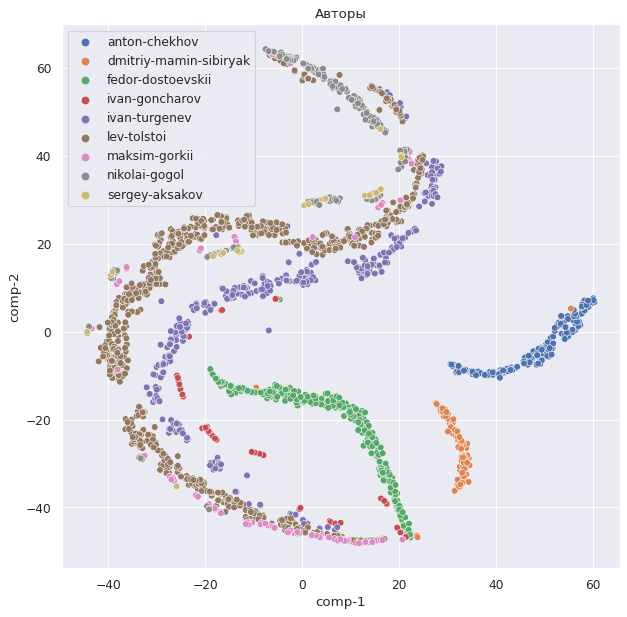

In [58]:
X = books_norm.drop(['author_num'], axis=1)

y = books['author']

plt.figure(figsize=(9,9), dpi=80)
tsne = TSNE(n_components=2, learning_rate=150)
z = tsne.fit_transform(X)

d = pd.DataFrame()
d["y"] = y
d["comp-1"] = z[:,0]
d["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=d.y.tolist(), data=d).set(title="Авторы") 